In [77]:
import os
import torch
import matplotlib.pyplot as plt
from domid.models.model_sdcn import mk_sdcn

from domid.arg_parser import mk_parser_main
os.chdir('../')
print("Current working directory:", os.getcwd())

Current working directory: /home/didsr/Documents/SDCN_December/DomId


In [84]:
parser = mk_parser_main()
args = parser.parse_args(
    [
        "--te_d",
        "7",
        "--tr_d",
        "0",
        "1",
        "2",
        "--zd_dim",
        "20",
        "--d_dim",
        "10",
        "--dpath",
        "zout",
        "--task",
        "mnistcolor10",
        "--model",
        "sdcn",
        "--apath",
        "domid/algos/builder_sdcn.py",
        "--bs",
        "10",
        "--split",
        "0.8",
        "--L",
        "5",
        "--debug",
        "--nocu",
        "--model_method",
        "cnn",
        "--prior",
        "Gaus",
        "--pre_tr",
        "1",
        "--epos",
        "3",
        "--trainer",
        "sdcn",
        "--feat_extract",
        "ae",
        "--pre_tr_weight_path",
        "./notebooks/2023-11-30 10:52:19.451201_mnist_ae/",
        
    ]
)

In [85]:
from domid.trainers.zoo_trainer import TrainerChainNodeGetter
trainer = TrainerChainNodeGetter('sdcn')()

# Create a Task 
Here is an example of the colored MNIST task. In this example, we treat color as the domains and numbers at the labels of the image. 

Each task for the training is defined in the tasks folder, where the node allowing to load one domain of the studied dataset at the time. The dataloader is defined seperatly. 

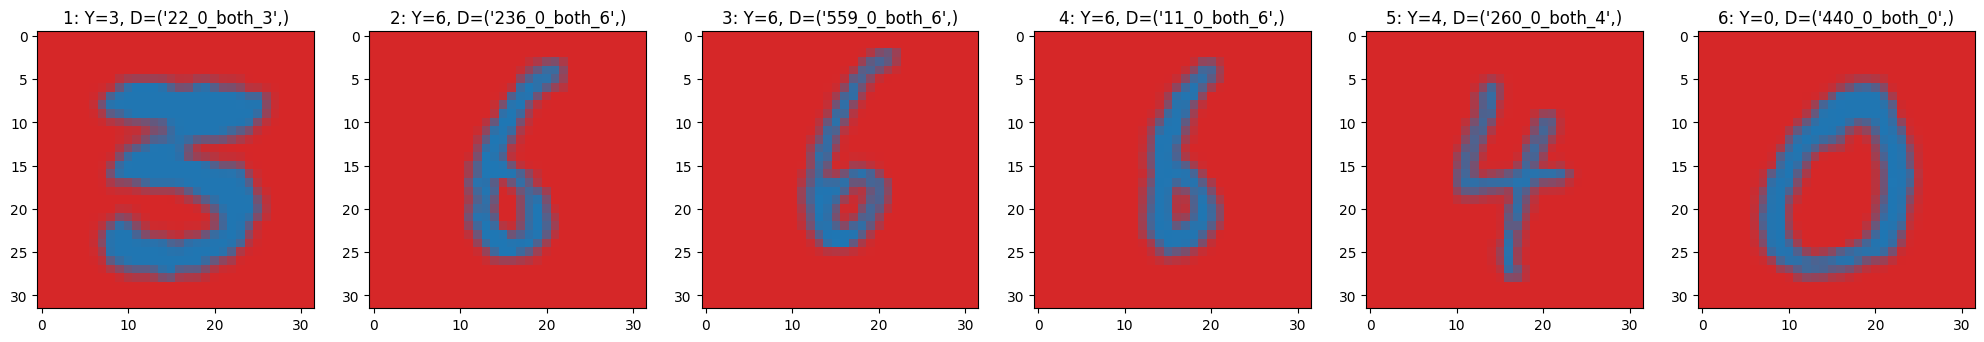

In [86]:
from domid.tasks.task_mnist_color import NodeTaskMNISTColor10
task = NodeTaskMNISTColor10()
dset2 = task.get_dset_by_domain(args, 'rgb_31_119_180')
ldr = torch.utils.data.DataLoader(dset2[0])

#Here is the sample visualizations of one of the domains from the task
plt.figure(figsize=(25,5))
for i, (tensor_x, vec_y, other, vec_d) in enumerate(ldr):
    plt.subplot(1, 6, i+1)
    plt.imshow(tensor_x[0, :, :, :,].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    plt.title("{}: Y={}, D={}".format(i+1, vec_y[0].numpy().argmax(), vec_d))
    if i >= 5:
        break
plt.show()

# Intialize the model

In [87]:
model = mk_sdcn()(zd_dim=args.zd_dim,
            d_dim=args.d_dim,
            device=args.device,
            L=args.L,
            i_c=task.isize.c,
            i_h=task.isize.h,
            i_w=task.isize.w,
            args=args,
        )

Filter sizes for GNN 8192 4096 2048 2048 4096 8192
Pre-trained weights loaded
Using a single GPU.


In [91]:
from domid.algos.observers.b_obvisitor_clustering_only import ObVisitorClusteringOnly
from domainlab.algos.observers.c_obvisitor_cleanup import ObVisitorCleanUp
from domainlab.algos.msels.c_msel_oracle import MSelOracleVisitor
from domainlab.algos.msels.c_msel_val import MSelValPerf
device = 'cpu'
from domid.compos.exp.exp_main import Exp
exp = Exp(args)
observer = ObVisitorCleanUp(ObVisitorClusteringOnly(exp, MSelOracleVisitor(MSelValPerf(max_es=args.es)), device))

no split between train and test datasets



using device: cpu



Filter sizes for GNN 8192 4096 2048 2048 4096 8192
Pre-trained weights loaded
Using a single GPU.
no split between train and test datasets
############################################################
Pretraining initialized.
############################################################
______Created directory to save result_________
Graph calculation method is heat





!!!: not committed yet
/home/didsr/Documents/SDCN_December/DomId/DomainLab/domainlab/utils/get_git_tag.py:16: UserWarning: !!!: not committed yet
  warnings.warn("!!!: not committed yet")



b'b6bdb55'
model name: debug_mnistcolor10_te_rgb_127_127_127_sdcn_bb6bdb55_not_commited_2024md_03md_01_12_33_26_seed_0


# Train the model

In [ ]:
trainer.init_business(model, task, observer, device, args)

no split between train and test datasets
############################################################
Pretraining initialized.
############################################################
______Created directory to save result_________
Graph calculation method is heat
